# The Spark Fondation #GRIPJULY21
## Task 2:Prediction using unsupervised ML
### Author: Vamsi Vasamsetti

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('E:\\Datasets\Iris.csv')

### Exploratory Data Analysis

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(["Id"],axis=1,inplace= True)

In [5]:
df.isnull().sum()   #checking for missing values in the dataset

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In the above table we can see that there are 3 unique Species present in the Iris dataset

In [8]:
df.Species.unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

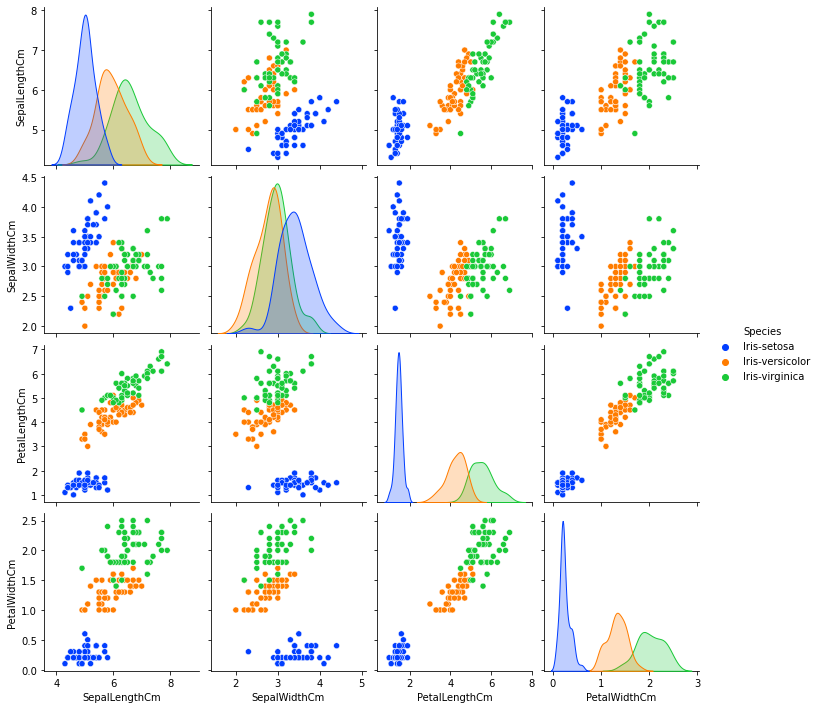

In [9]:
sns.pairplot(df,hue="Species",palette="bright")

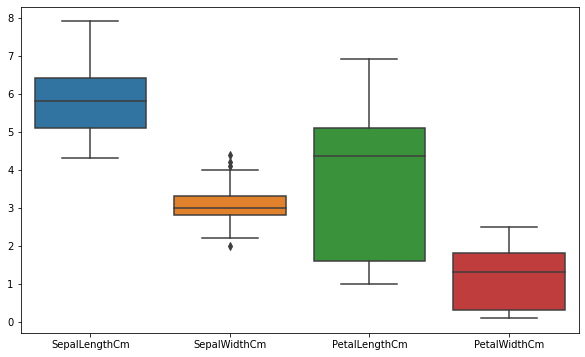

In [10]:
#Checking for outliers with the help of boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

<AxesSubplot:>

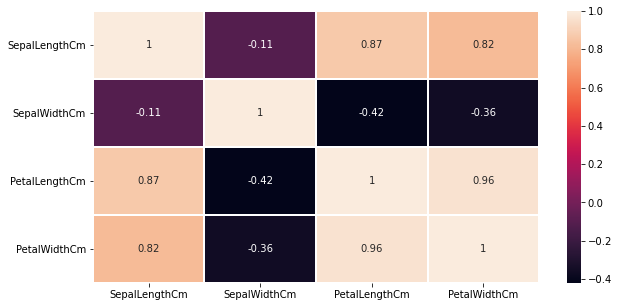

In [11]:
fig=plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),linewidths=1,annot=True)

In [12]:
X = df.iloc[:, [2,3]].values
y = df['Species'].map({'Iris-setosa': 0, 'Iris-virginica':1, 'Iris-versicolor':2}).values

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans_c = KMeans(n_clusters=i, init='k-means++', 
                      max_iter = 300, n_init = 10, random_state=0)
    kmeans_c.fit(X)
    wcss.append(kmeans_c.inertia_)
    print(f'wcss {i}: {kmeans_c.inertia_}')

C:\Users\Vamsi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


wcss 1: 550.6434666666671
wcss 2: 86.40394533570999
wcss 3: 31.38775897435898
wcss 4: 19.499400899685114
wcss 5: 13.93330875790876
wcss 6: 11.107174889156017
wcss 7: 9.225808730158734
wcss 8: 7.696685296574771
wcss 9: 6.472894541406304
wcss 10: 5.67856103236538


#### We will find out optimal value of k using the elbow method

C:\Users\Vamsi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


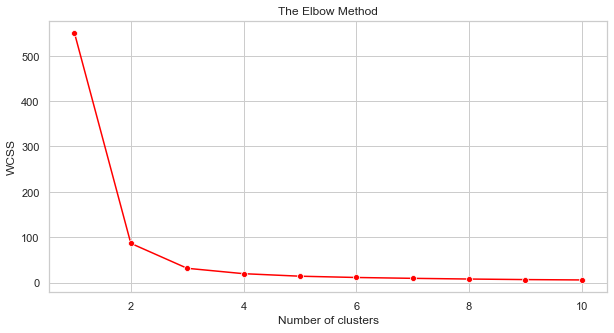

In [14]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### As we can see the elbow occurs at k=3

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

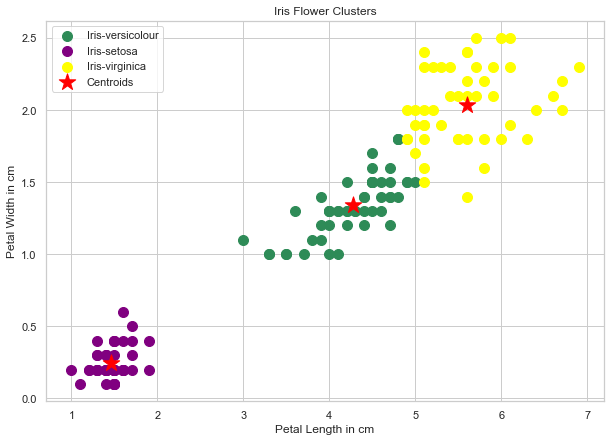

In [16]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 0], X [y_kmeans == 2, 1],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'red',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

## End of project. Thank you!